In [1]:
from BikeStationCDF import BikeStationCDF as BSCDF
from BikeStations import BikeStationNetwork as BSN
from BikeRelocationScheme import BikeRelocationScheme as BRS
import matplotlib.pyplot as plt
import numpy as np

In [2]:
myBikeNetwork = BSN()

In [3]:
AllStationsIds = myBikeNetwork.getAllStationOnNetwork()
RelocationSchemes = BRS(AllStationsIds).getRebalancingWeights()

In [4]:
# Station = AllStationsIds[3]
# WkDay = 0
# RelocationSchemes[Station][WkDay][BRS.C_WEIGHTINDEX]

In [5]:
myBikeNetwork.BikeStationsDict.keys()

dict_keys(['2', '9', '80', '81', '77', '75', '78', '74', '76', '58', '61', '59', '60', '57', '62', '53', '50', '51', '54', '56', '55', '52', '38', '36', '37', '34', '35', '39', '26', '25', '31', '29', '27', '28', '8', '6', '12', '10', '11'])

In [6]:
dayItinerary = myBikeNetwork.getDayItinerary(0)
# for idx, _ in enumerate(dayItinerary):
#     print('Itinerary for Station: ' + str(dayItinerary[idx][0][2]))

In [7]:
BikeInitialStatus = [s.availableBikes() for s in list(myBikeNetwork.BikeStationsDict.values())]

In [8]:
dayItinerary

[array([[  6.25 ,   0.   ,   2.   ,  69.   ],
        [  7.125,   0.   ,   2.   ,  74.   ],
        [  7.125,   1.   ,   2.   ,  -1.   ],
        [  7.125,   0.   ,   2.   ,  26.   ],
        [  7.375,   0.   ,   2.   , 228.   ],
        [  7.625,   0.   ,   2.   ,  30.   ],
        [  7.75 ,   1.   ,   2.   ,  -1.   ],
        [  7.875,   0.   ,   2.   ,  37.   ],
        [  8.125,   1.   ,   2.   ,  -1.   ],
        [  8.25 ,   0.   ,   2.   ,  84.   ],
        [  8.5  ,   0.   ,   2.   , 249.   ],
        [  8.5  ,   0.   ,   2.   ,  81.   ],
        [  8.5  ,   0.   ,   2.   ,  27.   ],
        [  8.625,   1.   ,   2.   ,  -1.   ],
        [  8.625,   0.   ,   2.   ,  32.   ],
        [  8.625,   0.   ,   2.   ,  58.   ],
        [  8.75 ,   0.   ,   2.   ,  55.   ],
        [  8.75 ,   0.   ,   2.   ,  12.   ],
        [  8.75 ,   0.   ,   2.   ,  19.   ],
        [  8.75 ,   1.   ,   2.   ,  -1.   ],
        [  8.75 ,   1.   ,   2.   ,  -1.   ],
        [  8.75 ,   0.   ,   2.   

In [9]:
C_SIMULATION_DAYS = 1
Counter = 0
for time in range(C_SIMULATION_DAYS*60*24):
# for time in range(360,480,1):
    # print('NewTime')
    for idx in range(len(dayItinerary)):
        for eventsStation in range(len(dayItinerary[idx])):
            if(int(dayItinerary[idx][eventsStation][0] * 60) == time):
                Counter += 1
                if(dayItinerary[idx][eventsStation][1] == BSN.C_ARRIVALS_IDX):
                    myBikeNetwork.getBikeStationObject(
                        int(dayItinerary[idx][eventsStation][2])).pushBike()
                else:
                    myBikeNetwork.getBikeStationObject(
                        int(dayItinerary[idx][eventsStation][2])).removeBike()
                        
#                 print(
#                     'Bike Event ' +
#                     str(Counter) +
#                     ' and station Id ' +
#                     str(dayItinerary[idx][eventsStation][2]) +
#                     ' at time ' + 
#                     str(time) +
#                     ' test value ' +
#                     str(int(dayItinerary[idx][eventsStation][0] * 60)))

Counter

3503

In [10]:
BikeFinalStatus = [s.availableBikes() for s in list(myBikeNetwork.BikeStationsDict.values())]
np.array(BikeFinalStatus) - np.array(BikeInitialStatus)

array([ 8,  8, -7,  7,  8, -2, -7,  5, -7,  4,  5,  6,  8, -6, -7,  3,  6,
        4, -7, -4,  2,  7,  8,  7,  2, -6, -7,  8,  7,  3,  8,  2,  5,  8,
        8,  8,  6,  7,  1])

In [11]:
C_BIKESTATION = 2

currentBikeStation =\
    myBikeNetwork.getBikeStationObject(C_BIKESTATION)
print(currentBikeStation)

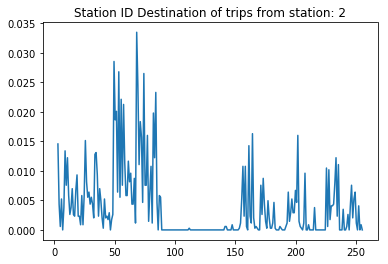

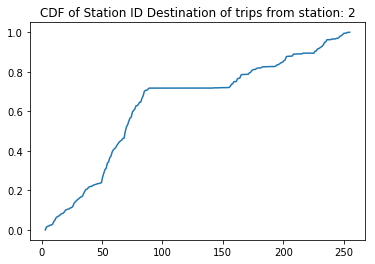

In [12]:
destinations = \
    list(
    currentBikeStation\
    .stationCDFDepartures\
    .wkDayDepartures[0]\
    .Destino_Id)
hist, bin_edges = \
    np.histogram(
        destinations, bins=np.max(destinations),
        density=True)

hist = np.append(hist, [0.0])
plt.figure(1)
plt.title('Station ID Destination of trips from station: ' + str(C_BIKESTATION))
plt.plot(bin_edges, hist)
plt.figure(2)
plt.title('CDF of Station ID Destination of trips from station: ' + str(C_BIKESTATION))
plt.plot(bin_edges, BSCDF.computeCDF(hist,bin_edges))



In [13]:
C_NUMBER_OF_TRIPS = 50
C_WEEKDAY = 5

Arrivals = np.empty(0)
Departures = np.empty(0)
for i in range(C_NUMBER_OF_TRIPS):
    BikeStationTrips = \
        currentBikeStation.getTripsOnWeekday(C_WEEKDAY)

    tArrivals =\
        BikeStationTrips[
            BikeStationTrips[:, 1] ==
            BSN.C_ARRIVALS_IDX]
    Arrivals = np.r_[Arrivals, tArrivals[:,0]]


    tDepartures =\
        BikeStationTrips[
            BikeStationTrips[:, 1] == 
            BSN.C_DEPARTURES_IDX]
    Departures = np.r_[Departures, tDepartures[:,0]]


In [14]:
BikeStationTrips

array([[ 6.25 ,  0.   ],
       [ 6.5  ,  1.   ],
       [ 7.125,  1.   ],
       [ 7.25 ,  0.   ],
       [ 7.25 ,  1.   ],
       [ 7.625,  1.   ],
       [ 7.75 ,  1.   ],
       [ 7.75 ,  0.   ],
       [ 8.   ,  0.   ],
       [ 8.   ,  0.   ],
       [ 8.   ,  1.   ],
       [ 8.5  ,  1.   ],
       [ 8.625,  0.   ],
       [ 8.625,  0.   ],
       [ 8.625,  0.   ],
       [ 8.75 ,  1.   ],
       [ 8.75 ,  0.   ],
       [ 8.75 ,  0.   ],
       [ 8.875,  0.   ],
       [ 8.875,  0.   ],
       [ 9.375,  0.   ],
       [ 9.75 ,  0.   ],
       [ 9.75 ,  1.   ],
       [10.5  ,  0.   ],
       [10.5  ,  1.   ],
       [10.5  ,  0.   ],
       [10.5  ,  1.   ],
       [10.625,  1.   ],
       [10.75 ,  1.   ],
       [11.125,  1.   ],
       [11.25 ,  1.   ],
       [11.375,  1.   ],
       [11.5  ,  1.   ],
       [11.625,  1.   ],
       [11.75 ,  0.   ],
       [12.375,  0.   ],
       [12.5  ,  1.   ],
       [12.625,  1.   ],
       [12.625,  1.   ],
       [12.625,  1.   ],


14.371096799375488
14.437605042016807


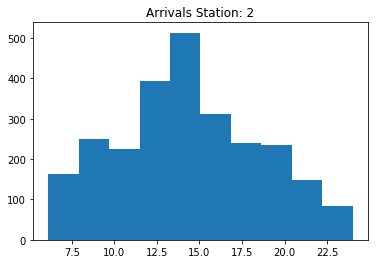

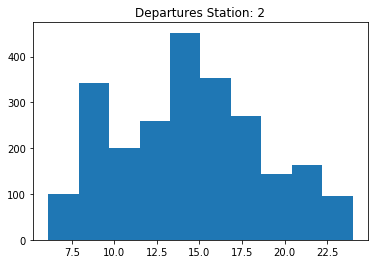

In [15]:
plt.figure(1)
plt.title('Arrivals Station: ' + 
    currentBikeStation.getStationId())
plt.hist(Arrivals)
print(np.mean(Arrivals))

plt.figure(2)
plt.title(
    'Departures Station: ' + 
    currentBikeStation.getStationId())
plt.hist(Departures)
print(np.mean(Departures))

In [16]:
ahist, abin_edges = \
    np.histogram(
        Arrivals, bins=24 * 8,
        density=True,
        range=(0.0, 24.0))
ahist = np.append(ahist, [0.0])

In [17]:
dhist, dbin_edges = \
    np.histogram(
        Departures, bins=24 * 8,
        density=True,
        range=(0.0, 24.0))
dhist = np.append(dhist, [0.0])

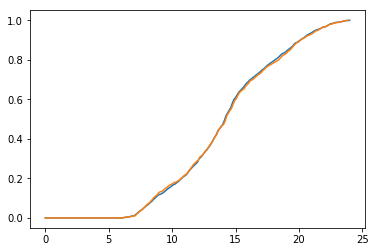

In [18]:
x =\
currentBikeStation.stationCDFArrivals\
.wkDayDepartures_cdf[C_WEEKDAY][0]

y =\
currentBikeStation.stationCDFArrivals\
.wkDayDepartures_cdf[C_WEEKDAY][1]

acdf = BSCDF.computeCDF(
            ahist,abin_edges)

plt.plot(x/3600,y)
plt.plot(24.0*np.arange(len(acdf))/len(acdf), acdf)

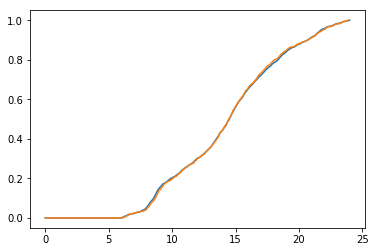

In [19]:
x =\
currentBikeStation.stationCDFDepartures\
.wkDayDepartures_cdf[C_WEEKDAY][0]

y =\
currentBikeStation.stationCDFDepartures\
.wkDayDepartures_cdf[C_WEEKDAY][1]

dcdf = BSCDF.computeCDF(
            dhist,dbin_edges)

plt.plot(x/3600,y)
plt.plot(24.0*np.arange(len(dcdf))/len(dcdf), dcdf)